# **Step 1: Import libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

*  It tells Matplotlib to use the default plot style.
*  Matplotlib has many built-in visual styles (like themes), for example:

1. "seaborn"
2. "ggplot"
3. "dark_background"
4. "bmh"
5. "default" ← the normal Matplotlib look

**You can try other themes**
* plt.style.use("seaborn-v0_8")
* plt.style.use("ggplot")
* plt.style.use("dark_background")


# **Step 2: Load dataset**

**Titanic - machine Learning from Disaster**

In [5]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Step 3: Understanding the dataset**

**Shape (rows & Columns)**

Understanding the number of rows and columns helps estimate data volume and plan EDA accordingly.

In [6]:
df.shape

(891, 12)

**Column names**

Listing column names helps us quickly understand the structure of the dataset and identify important variables.

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Datatypes - Missing Values - Non null counts**

df.info() is used to check data types and missing values. It helps decide data cleaning techniques such as type conversion and imputation.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Quick statistics for numeric columns**

Descriptive statistics give an overall summary of numerical features and help us identify skewness and outliers.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Step 4: Missing values & Duplicates**

**Check missing values in each column**

Checking missing values is necessary to avoid errors in analysis and modeling. Columns with high missing values may need imputation or removal.

In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Check duplicates**

Duplicate rows may distort insights, so we check and handle duplicates to maintain data quality.

In [12]:
df.duplicated().sum()

np.int64(0)

# **Step 5: Understand the target variable**

**Our prediction column is Survived**

*   0 = did not survive
*   1 = survived



**Check value counts**

We analyze the target variable distribution to understand class imbalance issues and overall survival rate.

In [13]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


**Percentage form**

Converting target counts into percentages makes the survival distribution easier to interpret and communicate.

In [14]:
df['Survived'].value_counts(normalize=True) * 100

,proportion
Survived,
0,61.616162
1,38.383838


# **Summary of above steps**

*   Understand dataset size and structure
*   Identify datatypes
*   Detect missing values
*   Detect duplicates
*   Study distribution of target variable
*   Plan cleaning & visualization steps
*   All these steps together ensure:

    “Data is clean, understood, and ready before deeper analysis.”

# **Step 6: Handle missing values**

**From above steps get to know that :**

*   Age → missing
*   Cabin → many missing
*   Embarked → few missing

**Drop Cabin column**

In [15]:
df = df.drop(columns=['Cabin'])

**Why we dropped Cabin?**

* more than 75% values are missing

* filling so many values will add noise

* Cabin is not essential for basic EDA

**What function does:**

* drop() removes selected rows/columns

* columns=['Cabin'] tells it to drop a column

**Handle missing Age values**

**We will fill Age using median, not mean.**

**Why median?**

* Age has outliers

* median is robust to extreme values

* mean would shift due to old/very young passengers

**What function does:**

* fillna() fills missing values

* df['Age'].median() calculates median age

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())

**Handle missing Embarked values**

**We fill with most frequent category (mode)**

**Why mode?**

* Embarked is categorical

* mean/median don’t make sense

* most common port is reasonable assumption

**What function does:**

* mode() returns most frequent value

* [0] selects first mode value

In [17]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

**Check again if any missing values left**

In [18]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Step 7: Univariate Analysis**

**Distribution of Age**

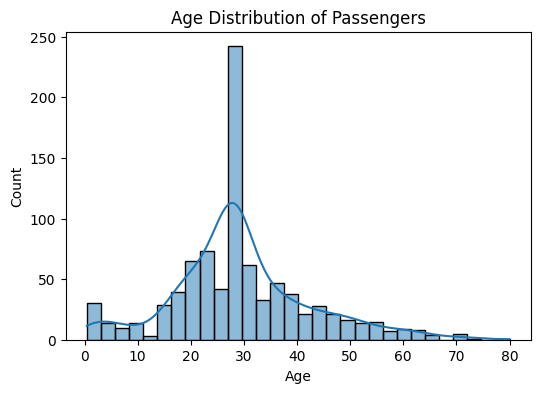

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**What this does**

* histplot → histogram of Age

* kde=True → smooth curve showing distribution

* figure() → controls graph size

* title/xlabel/ylabel → add labels

**Why it is important**

* shows age spread

* detects skewness

* helps decide age groups later

**Distribution of Fare**

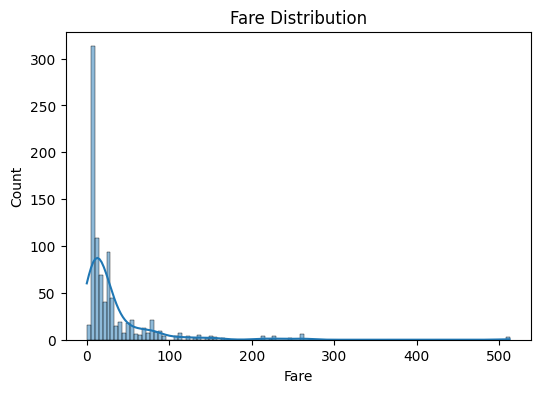

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df['Fare'], kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

**What above plot reflects**
* fare has extreme values

* tells whether fares are skewed

* hints at rich vs poor passengers

**Count of Survival (0 vs 1)**

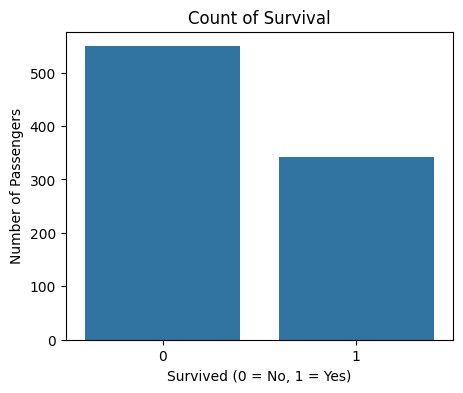

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=df)
plt.title("Count of Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

**What above plot reflects**

* shows class imbalance

* tells how many survived vs died

# **Step 8: Survival Analysis**

**relationship with other features**

**Survival by Gender**

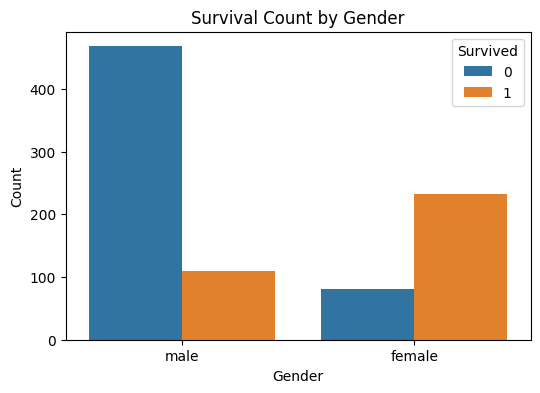

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**What this plot shows**

* gender on x-axis

* different colors = survived vs not

* height of bars = number of passengers

**Why it is important**

* Titanic survival is strongly related to gender

* helps see “women and children first” effect

**Survival by Passenger Class (Pclass)**

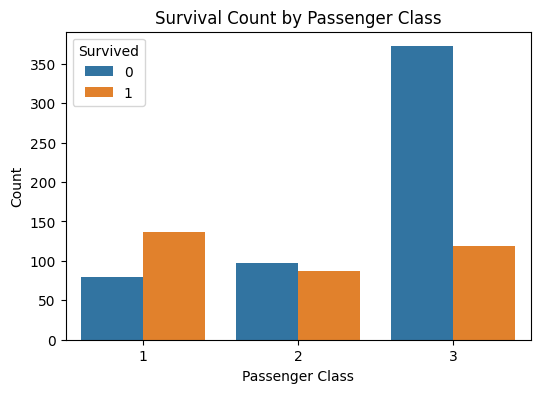

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

**What it shows**

* 1st / 2nd / 3rd class vs survival

**Why important**

* higher class had better cabins and lifeboat access

* strong economic inequality insight

**Survival by Age Group**

**Step i — create age groups**

In [25]:
df['Age_group'] = pd.cut(df['Age'],
                         bins=[0, 12, 18, 30, 50, 80],
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

**Step ii — plot survival by age group**

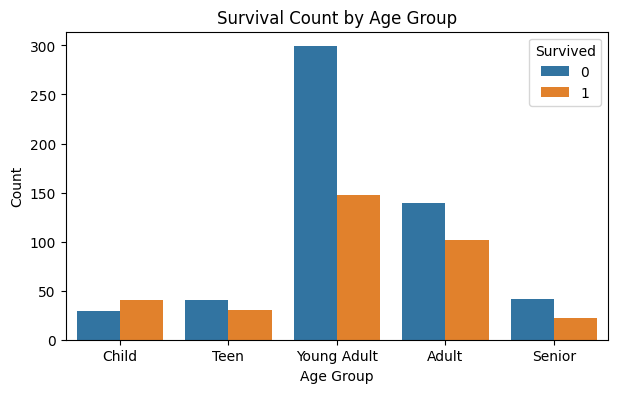

In [26]:
plt.figure(figsize=(7,4))
sns.countplot(x='Age_group', hue='Survived', data=df)
plt.title("Survival Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

**What pd.cut() does**

* divides continuous Age column into ranges

* assigns labels (Child, Teen, etc.)

**Why this step is important**

* raw age is hard to interpret

* age groups show survival pattern clearly

* supports the rule “women and children first”

**Survival by Embarkation Port**

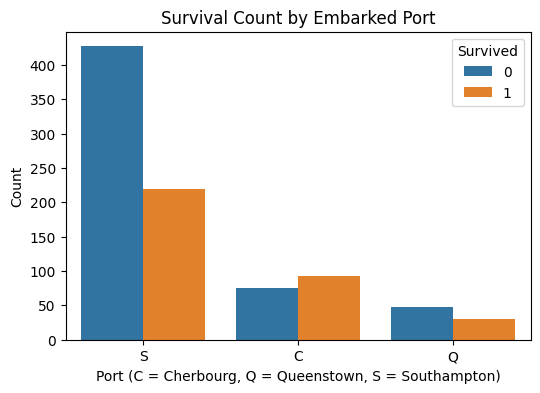

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival Count by Embarked Port")
plt.xlabel("Port (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Count")
plt.show()

**Why important**

* passengers from different ports had different:

* socio-economic background

* travel purpose

* affects survival indirectly

# **Step 9: Correlation Heatmap (numeric relationships)**

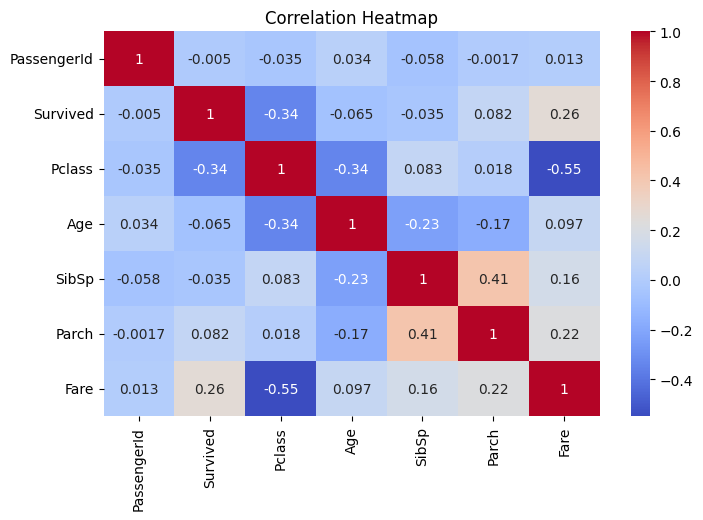

In [29]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

* Heatmap shows correlation between numerical features

* Values range from −1 to +1

* +1 = strong positive relationship

* −1 = strong negative relationship

* 0 = no relationship

**Useful to see:**

* Fare vs Pclass

* Survived vs other features

# **Step 10: Final insights**

**✔ Key Insights from Titanic EDA**

* Majority of passengers did not survive

* Females had a significantly higher survival rate

* 1st class passengers survived more than 2nd & 3rd class

* Children had better survival chances than adults

* Higher fare is associated with higher survival (wealth effect)

* Passengers embarking from Cherbourg had better survival chances